In [1]:
# Installation des packages
#!pip install pandas
#!pip install missingno
#!pip install matplotlib
#!pip install seaborn


In [101]:
# Importation des packages
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split

#imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

# Visualisation des données
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données

In [3]:
data = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter= "\t")

C:\Users\Hady COULIBALY\AppData\Local\Temp\ipykernel_20268\1082942933.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter= "\t")


#  1- Exploration de données 

### 1_1- Struture des données

In [4]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Connaitre la dimmension de notre jeu de donnée
data.shape

(320772, 162)

In [6]:
# Obtener les information sur les variables
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [7]:
# Affichez toutes les variables du jeu de donnée
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [8]:
# Determiner le type de chaque variables
data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [9]:
# Résumer statistique des variables numériques
data.describe(exclude = "object")

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [10]:
# Résumer statistique des variables non numériques
data.describe(include = "object")

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,...,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836
unique,320638,320749,3535,189636,189568,180639,180495,221347,38584,13826,...,5,14,42,1021,1021,1021,3543,3543,75836,75836
top,24463061071,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489077120,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:beverages,Boissons,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...
freq,2,1,169868,20,20,33,33,410,201,4669,...,62763,22624,22624,168905,168905,168905,6054,6054,1,1


### 1_2 - Identification des valeurs manquantes
##### Indentifions les VM puis calculons le pourcentage des VM de chaque variables

In [11]:
# Somme des valeurs manquantes
valeur_manq = data.isnull().sum()

# Pourcentage des valeurs manquantes
pourc_valeur_manq = (valeur_manq / len(data)) * 100

# Tableau des valeurs manquantes par variables
table_valeur_manq = pd.DataFrame({ "Valeur_manquante": valeur_manq, "Porcentage": pourc_valeur_manq})
print(table_valeur_manq)

                         Valeur_manquante  Porcentage
code                                   23    0.007170
url                                    23    0.007170
creator                                 2    0.000623
created_t                               3    0.000935
created_datetime                        9    0.002806
...                                   ...         ...
carbon-footprint_100g              320504   99.916452
nutrition-score-fr_100g             99562   31.038245
nutrition-score-uk_100g             99562   31.038245
glycemic-index_100g                320772  100.000000
water-hardness_100g                320772  100.000000

[162 rows x 2 columns]


 #### - *Visualisation des valeurs manquantes*

#####  -Méthode 1: avec le package (missingno)

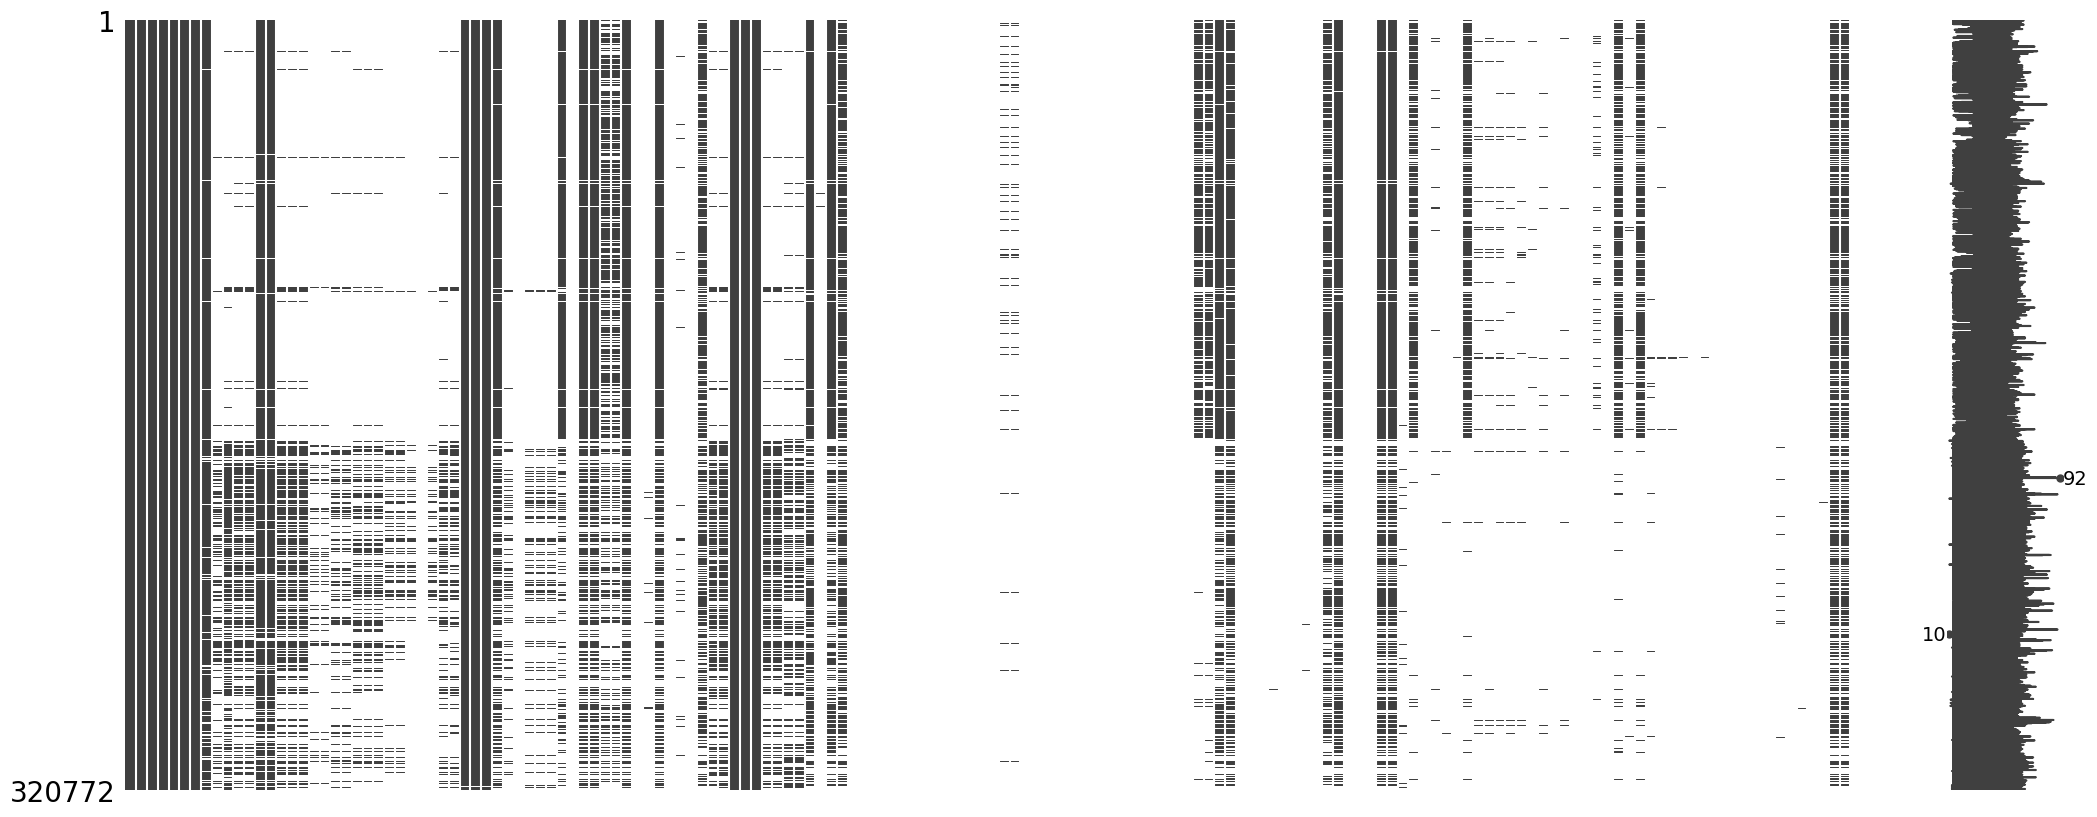

In [12]:
msno.matrix(data)
plt.show()


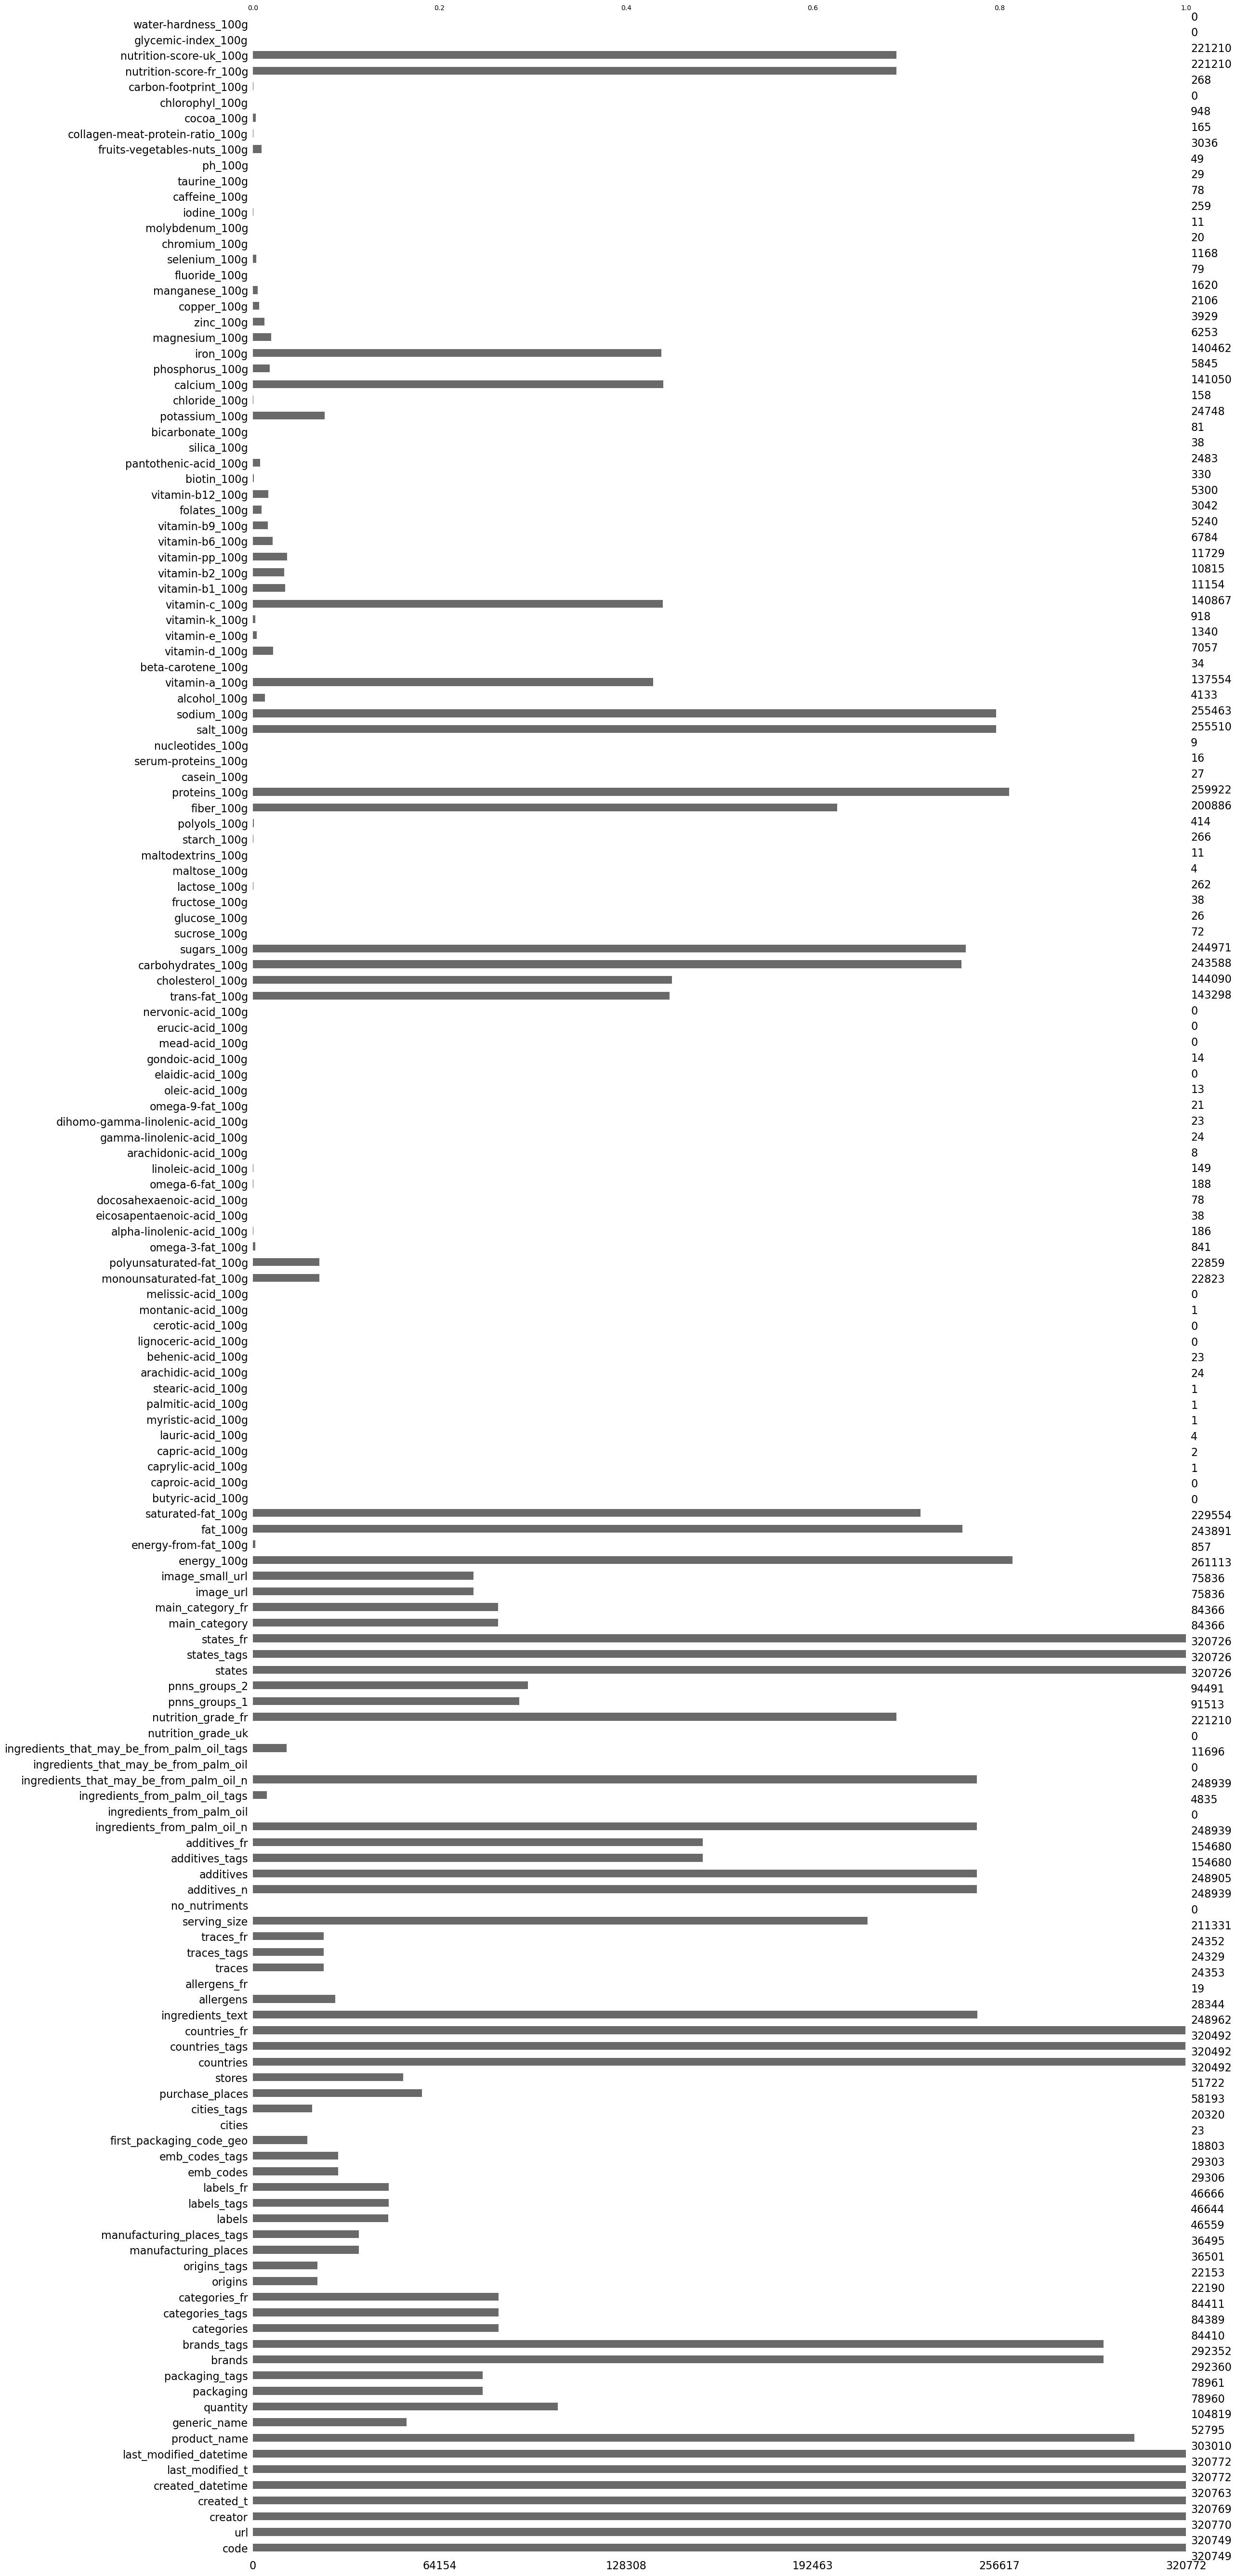

In [13]:
# Barplot des valeurs manquantes
msno.bar(data)
plt.show()

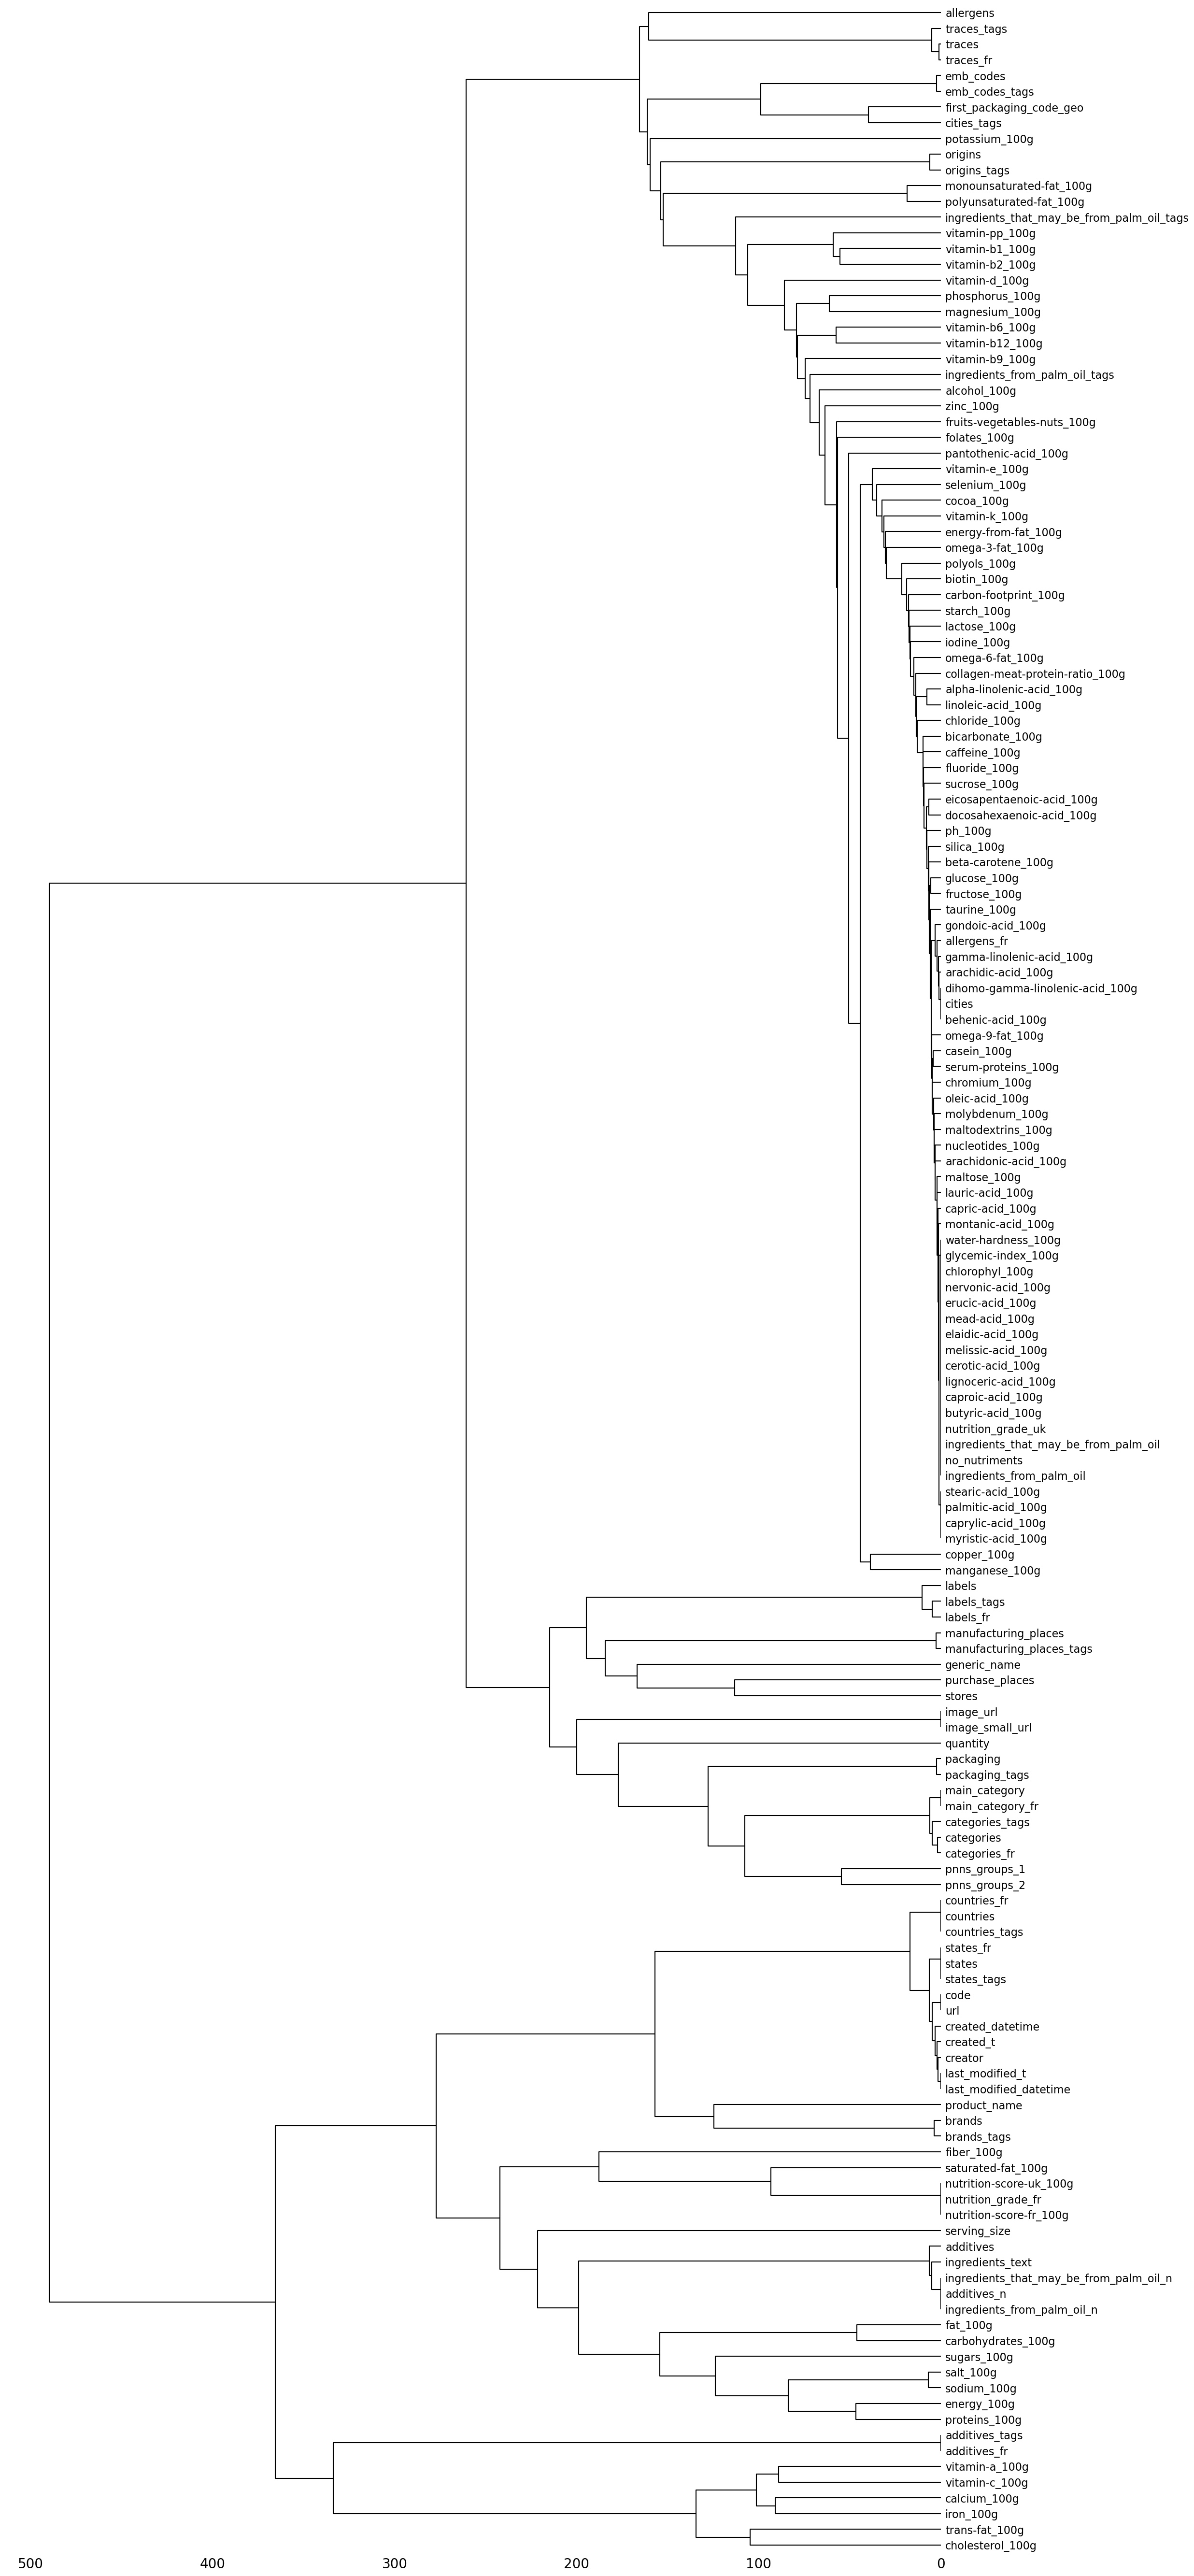

In [14]:
# Dendrogram des valeurs manquantes
msno.dendrogram(data)
plt.show()

In [15]:
msno.nullity_filter(data)
plt.show()

#####  -Méthode 2: avec le package (seaborn)

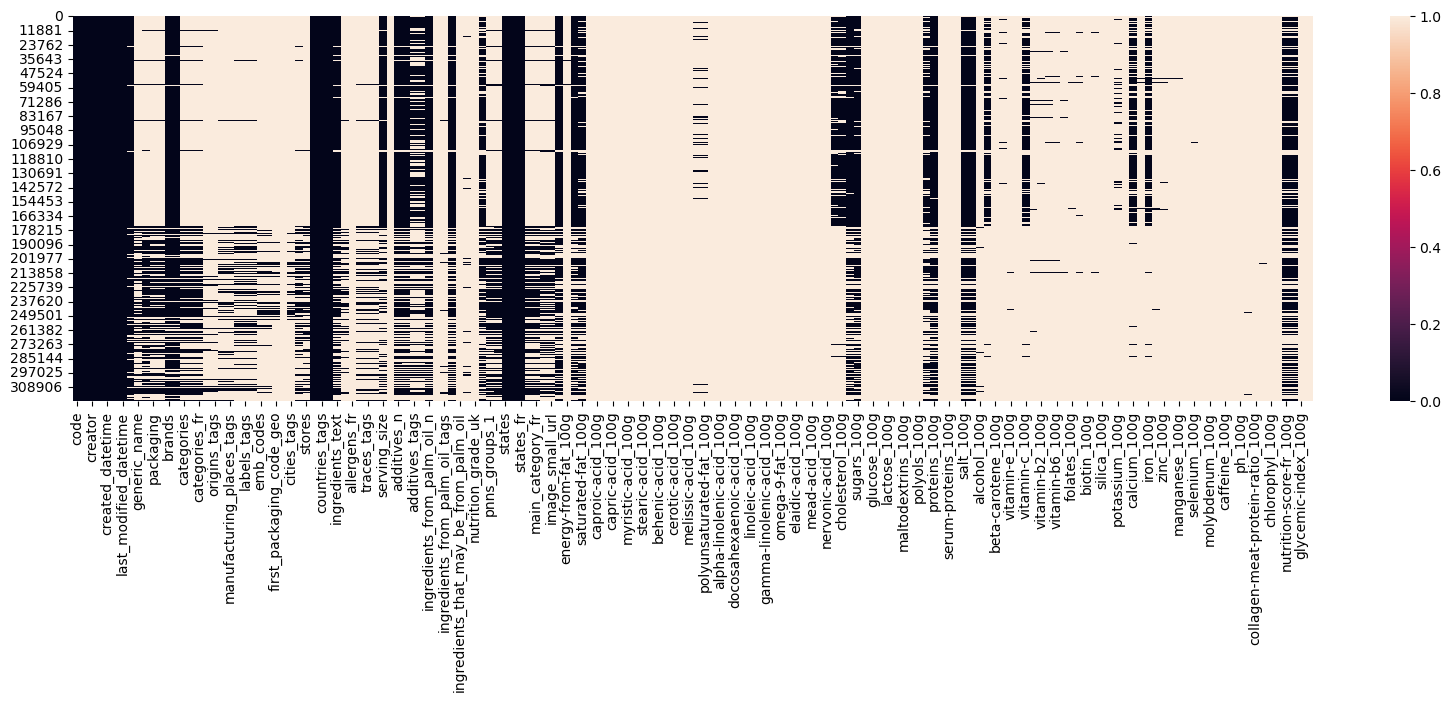

In [16]:
plt.figure(figsize=(20, 5))
sns.heatmap(data.isnull(), cbar=True)
plt.show()

In [17]:
df=data

## 1_3- Traitement des données manquantes

In [18]:
# Renommer toutes les variables qui contient un (-) par (_) pour facilité l'utilisation
df = df.rename(columns={"nutrition-score-fr_100g": "nutrition-score-fr_100g",
                       "nutrition-score-uk_100g": "nutrition_score_uk_100g",
                        "saturated-fat_100g": "saturated_fat_100g"})

### - Taux de remplissage
##### Nous allons repérer les variables avec un niveau de données manquantes supérieur à 50% pour fixer un seuil de suppression à 50% de taux de remplissage

In [19]:
# Calcule du taux de remplissage
taux_remplissage = (1 - df.isnull().mean()) * 100

In [20]:
# Créer un DataFrame avec les taux de remplissage
data_taux_remp = pd.DataFrame({"Variable" : taux_remplissage.index , "Taux_de_Null" : taux_remplissage.values})
data_taux_remp

,Variable,Taux_de_Null
0,code,99.992830
1,url,99.992830
2,creator,99.999377
3,created_t,99.999065
4,created_datetime,99.997194
...,...,...
157,carbon-footprint_100g,0.083548
158,nutrition-score-fr_100g,68.961755
159,nutrition_score_uk_100g,68.961755
160,glycemic-index_100g,0.000000


In [21]:
# Trier les variables par taux de remplissage décroissant
data_taux_remp = data_taux_remp.sort_values("Taux_de_Null", ascending = False)
data_taux_remp

,Variable,Taux_de_Null
5,last_modified_t,100.000000
6,last_modified_datetime,100.000000
2,creator,99.999377
3,created_t,99.999065
4,created_datetime,99.997194
...,...,...
68,caproic-acid_100g,0.000000
67,butyric-acid_100g,0.000000
52,nutrition_grade_uk,0.000000
50,ingredients_that_may_be_from_palm_oil,0.000000


C:\Users\Hady COULIBALY\AppData\Local\Temp\ipykernel_20268\1779076921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taux_de_Null", y="Variable", data=data_taux_remp, palette="coolwarm")


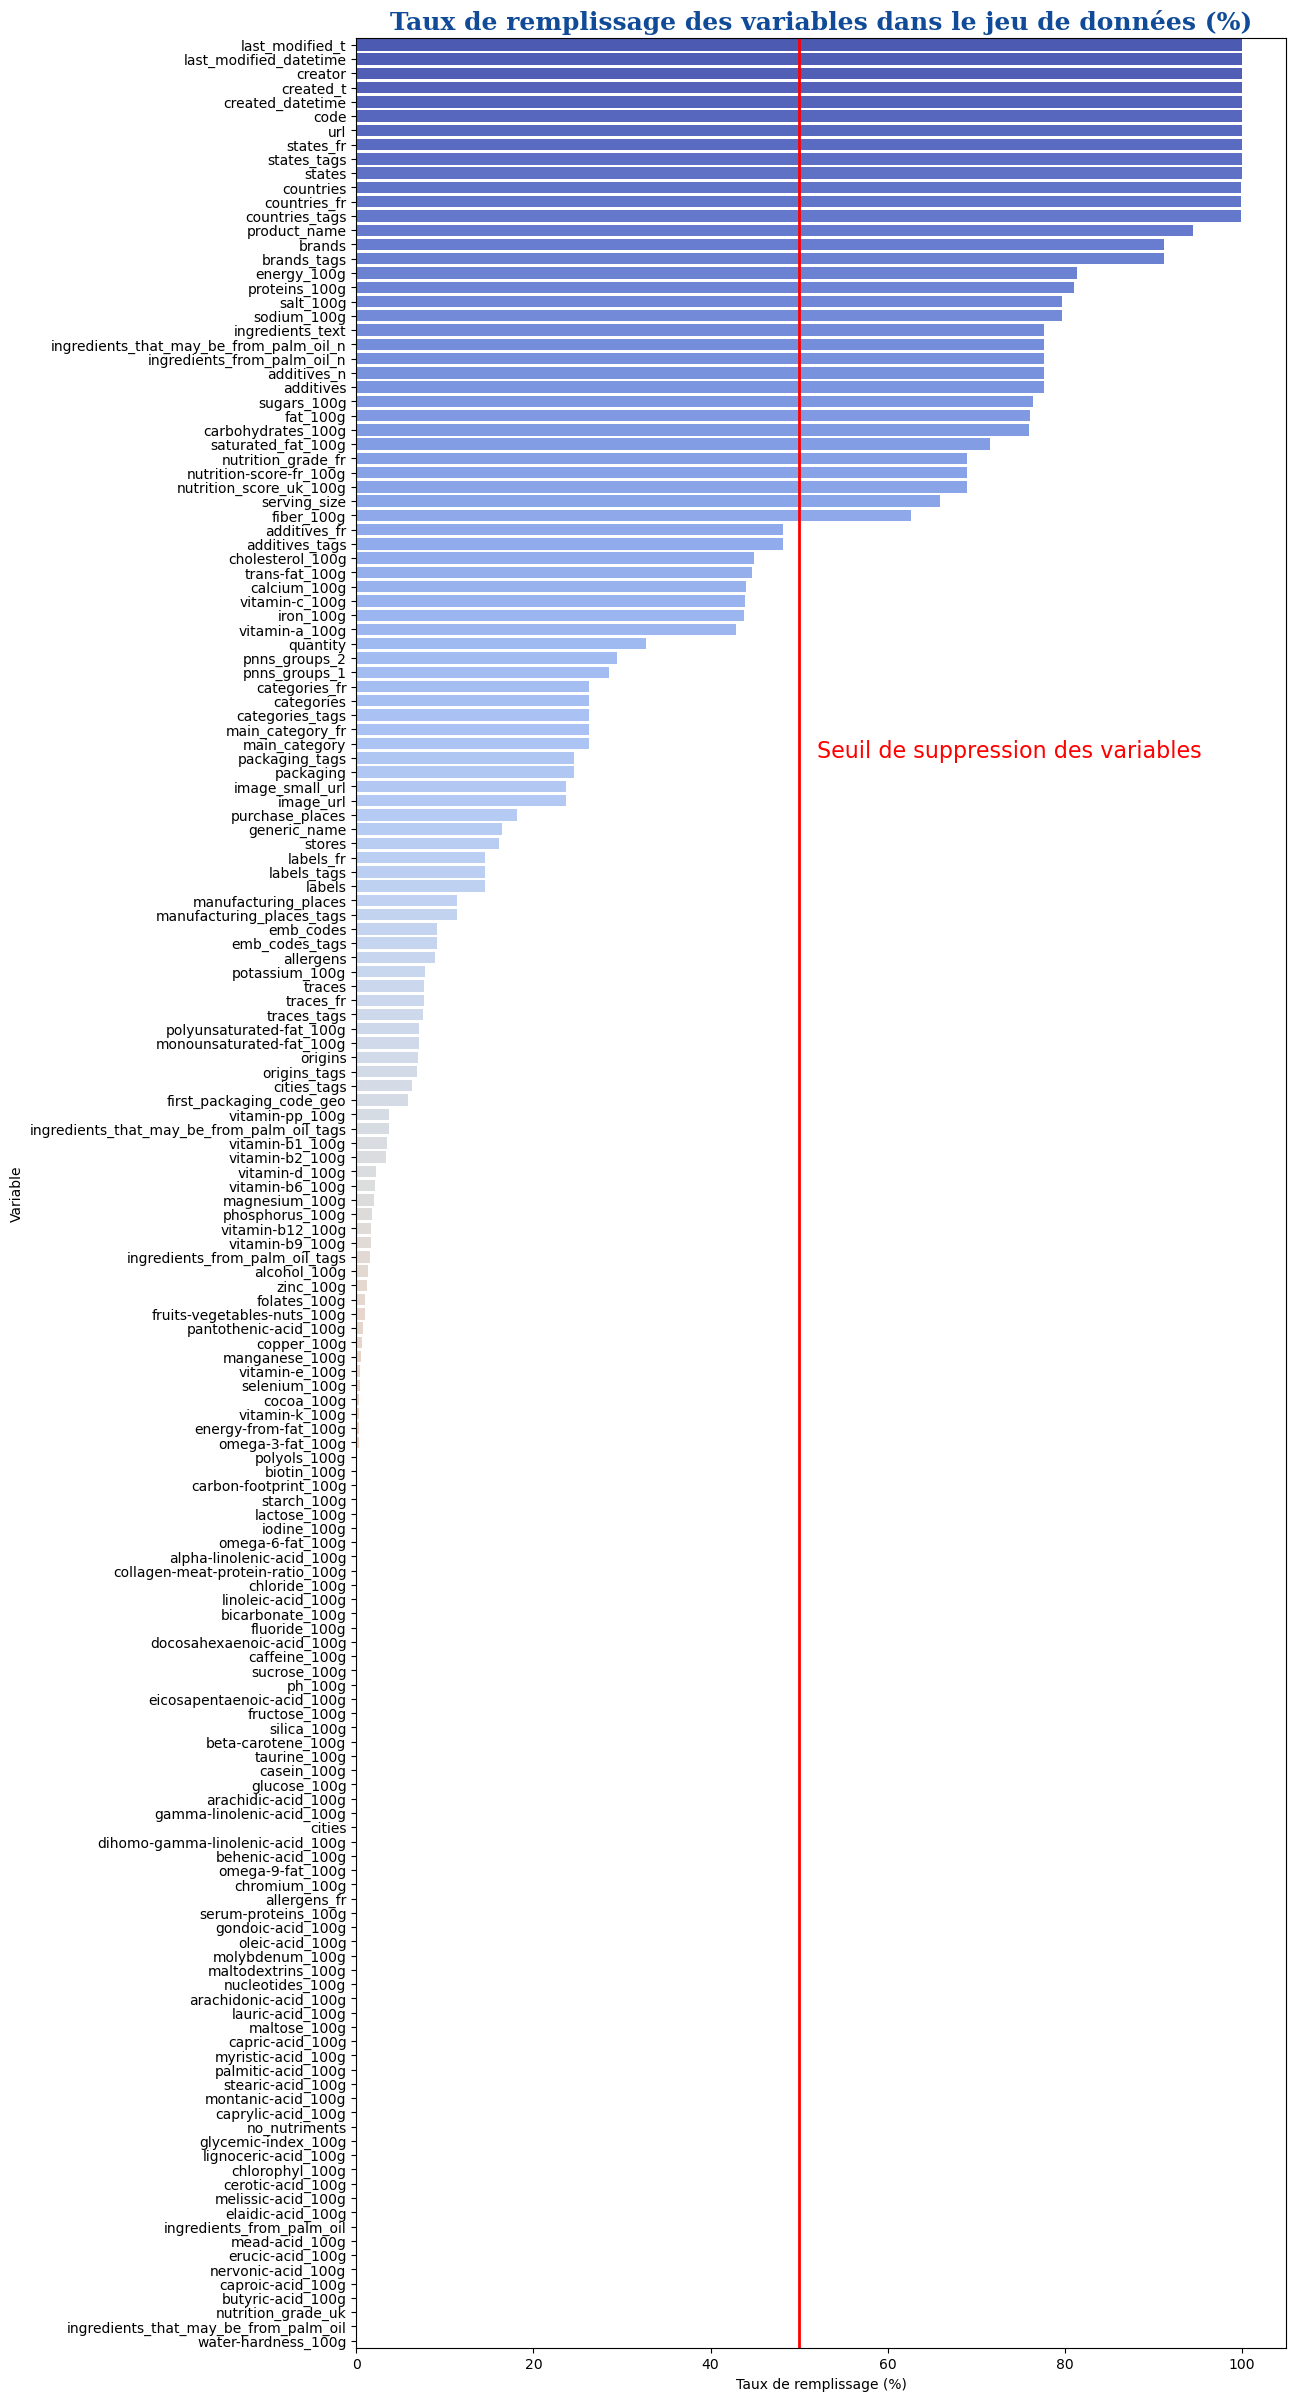

In [22]:
# Seuil de suppression
seuil_sup = 50

fig = plt.figure(figsize=(12, 30))


titre_graphique = {'family': 'serif',
              'color':  '#114b97',
              'weight': 'bold',
              'size': 18,
             }
sns.barplot(x="Taux_de_Null", y="Variable", data=data_taux_remp, palette="coolwarm")
# Seuil pour suppression des variables
plt.axvline(x=seuil_sup, linewidth=2, color='r')
plt.text(seuil_sup + 2, 50, 'Seuil de suppression des variables', fontsize=16, color='r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=titre_graphique)
plt.xlabel("Taux de remplissage (%)")
plt.show()


### - Récupération des variables ayant moins de 50 % de données manquantes
##### Nous allons maintenant extraire les variables qui ont moins de 50% des valeurs manquantes dans notre DataFrame. Il sont répresentées par TRUE

In [23]:
# Création de masque (True signifie que la colonne a au moins 50% de valeurs manquantes et False sinon)
masque = (valeur_manq / df.shape[0]).le(0.5)
masque

code                        True
url                         True
creator                     True
created_t                   True
created_datetime            True
                           ...  
carbon-footprint_100g      False
nutrition-score-fr_100g     True
nutrition-score-uk_100g     True
glycemic-index_100g        False
water-hardness_100g        False
Length: 162, dtype: bool

In [109]:
# Extraction des variables ayant moins de 50% de données manquantes
col_a_garder = df.columns[masque]

df_filtré = df.loc[:, col_a_garder]
df_filtré.shape

(320772, 34)

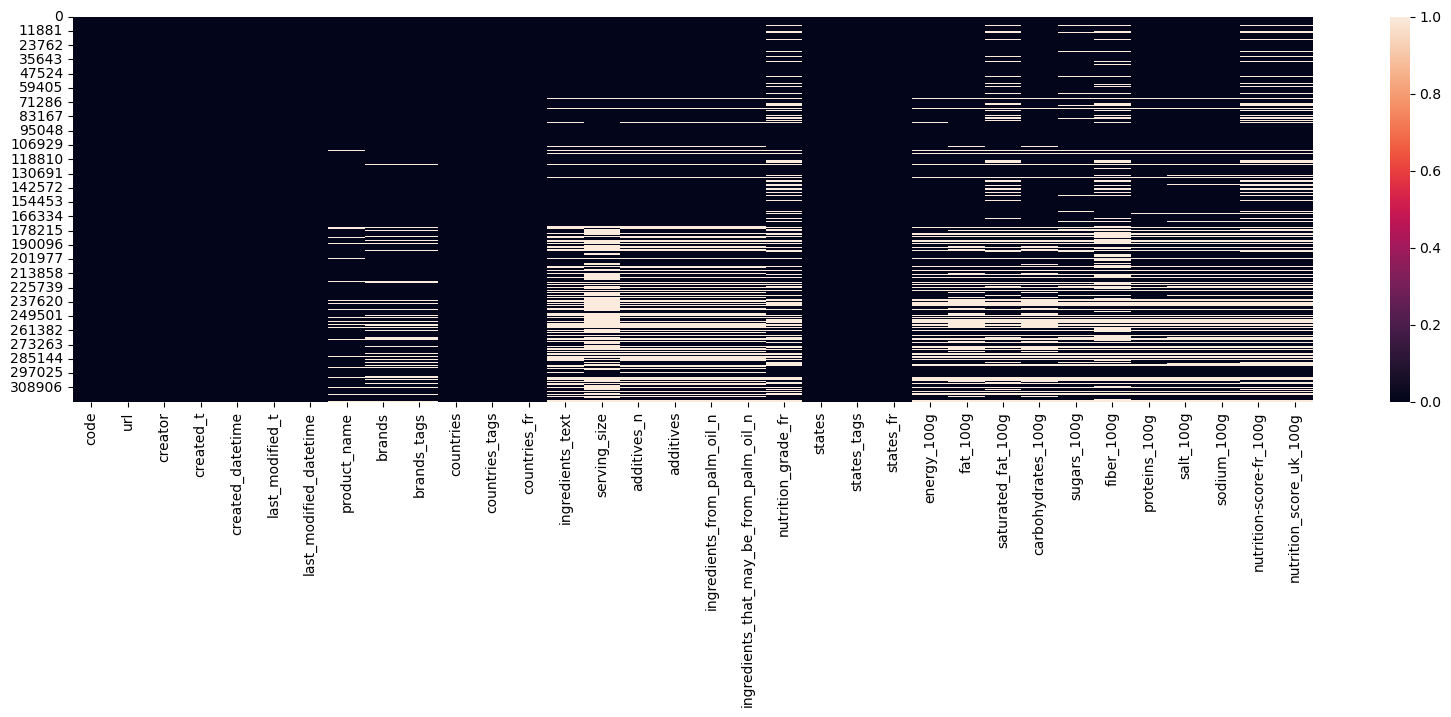

In [25]:
plt.figure(figsize=(20,5))
sns.heatmap(df_filtré.isnull(), cbar=True)
plt.show()
           

##### On continue à présent avec la base df_filtré qui contient des variable a moins de 50% des données manquantes pour supprimer, remplacer ou imputer les données.

### Suppression des observations qui n'ont pas de product_names distinct

In [110]:
df_filtré = df_filtré.dropna(subset=['product_name']) 
df_filtré.shape

(303010, 34)

In [111]:
df_filtré.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_score_uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


#### Convertion de la variables qui ont les dates (de object en datetime)

In [112]:
#Observation des colonnes qui contiennent le _t et le _datetime
print(df_filtré.iloc[:,df_filtré.columns.str.endswith('_t')].head())
print('\n', df_filtré.iloc[:,df_filtré.columns.str.endswith('_datetime')].head())




    created_t last_modified_t
0  1474103866      1474103893
1  1489069957      1489069957
2  1489069957      1489069957
3  1489055731      1489055731
4  1489055653      1489055653

        created_datetime last_modified_datetime
0  2016-09-17T09:17:46Z   2016-09-17T09:18:13Z
1  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z
2  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z
3  2017-03-09T10:35:31Z   2017-03-09T10:35:31Z
4  2017-03-09T10:34:13Z   2017-03-09T10:34:13Z


In [113]:
df_filtré['created_datetime'] = pd.to_datetime(df_filtré['created_t'], unit='s',  errors='coerce')
df_filtré['last_modified_datetime'] = pd.to_datetime(df_filtré['last_modified_t'], unit='s',  errors='coerce')
df_filtré = df_filtré.drop(['created_t','last_modified_t'], axis=1)
df_filtré.head(3)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_score_uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46,2016-09-17 09:18:13,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,...,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.00,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,...,17.86,0.00,60.71,17.86,7.1,17.86,0.635,0.25,0.0,0.0


In [114]:
# We fills the nulls
df_filtré['created_datetime'].fillna(method='ffill', inplace=True)
df_filtré['last_modified_datetime'].fillna(method='ffill', inplace=True)

### vérification des doublons

In [115]:
df_filtré.duplicated().sum()

0

In [116]:
df_filtré[df_filtré.duplicated(keep=False)]

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_score_uk_100g


#### Après se premier travail sur le nottoyage partiel des données, nous allons maintenant regarder la distribution des variables et définir si elles suivent une loi normale, ce qui nous aidera à prendre une décision pour la méthode d'imputation des valeurs manquantes.

### Vérification de la normalité des données

In [117]:
# Selection des variables numériques
var_num_features = list(df_filtré.select_dtypes(include=["number"]).columns)
var_num_features

['additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition_score_uk_100g']

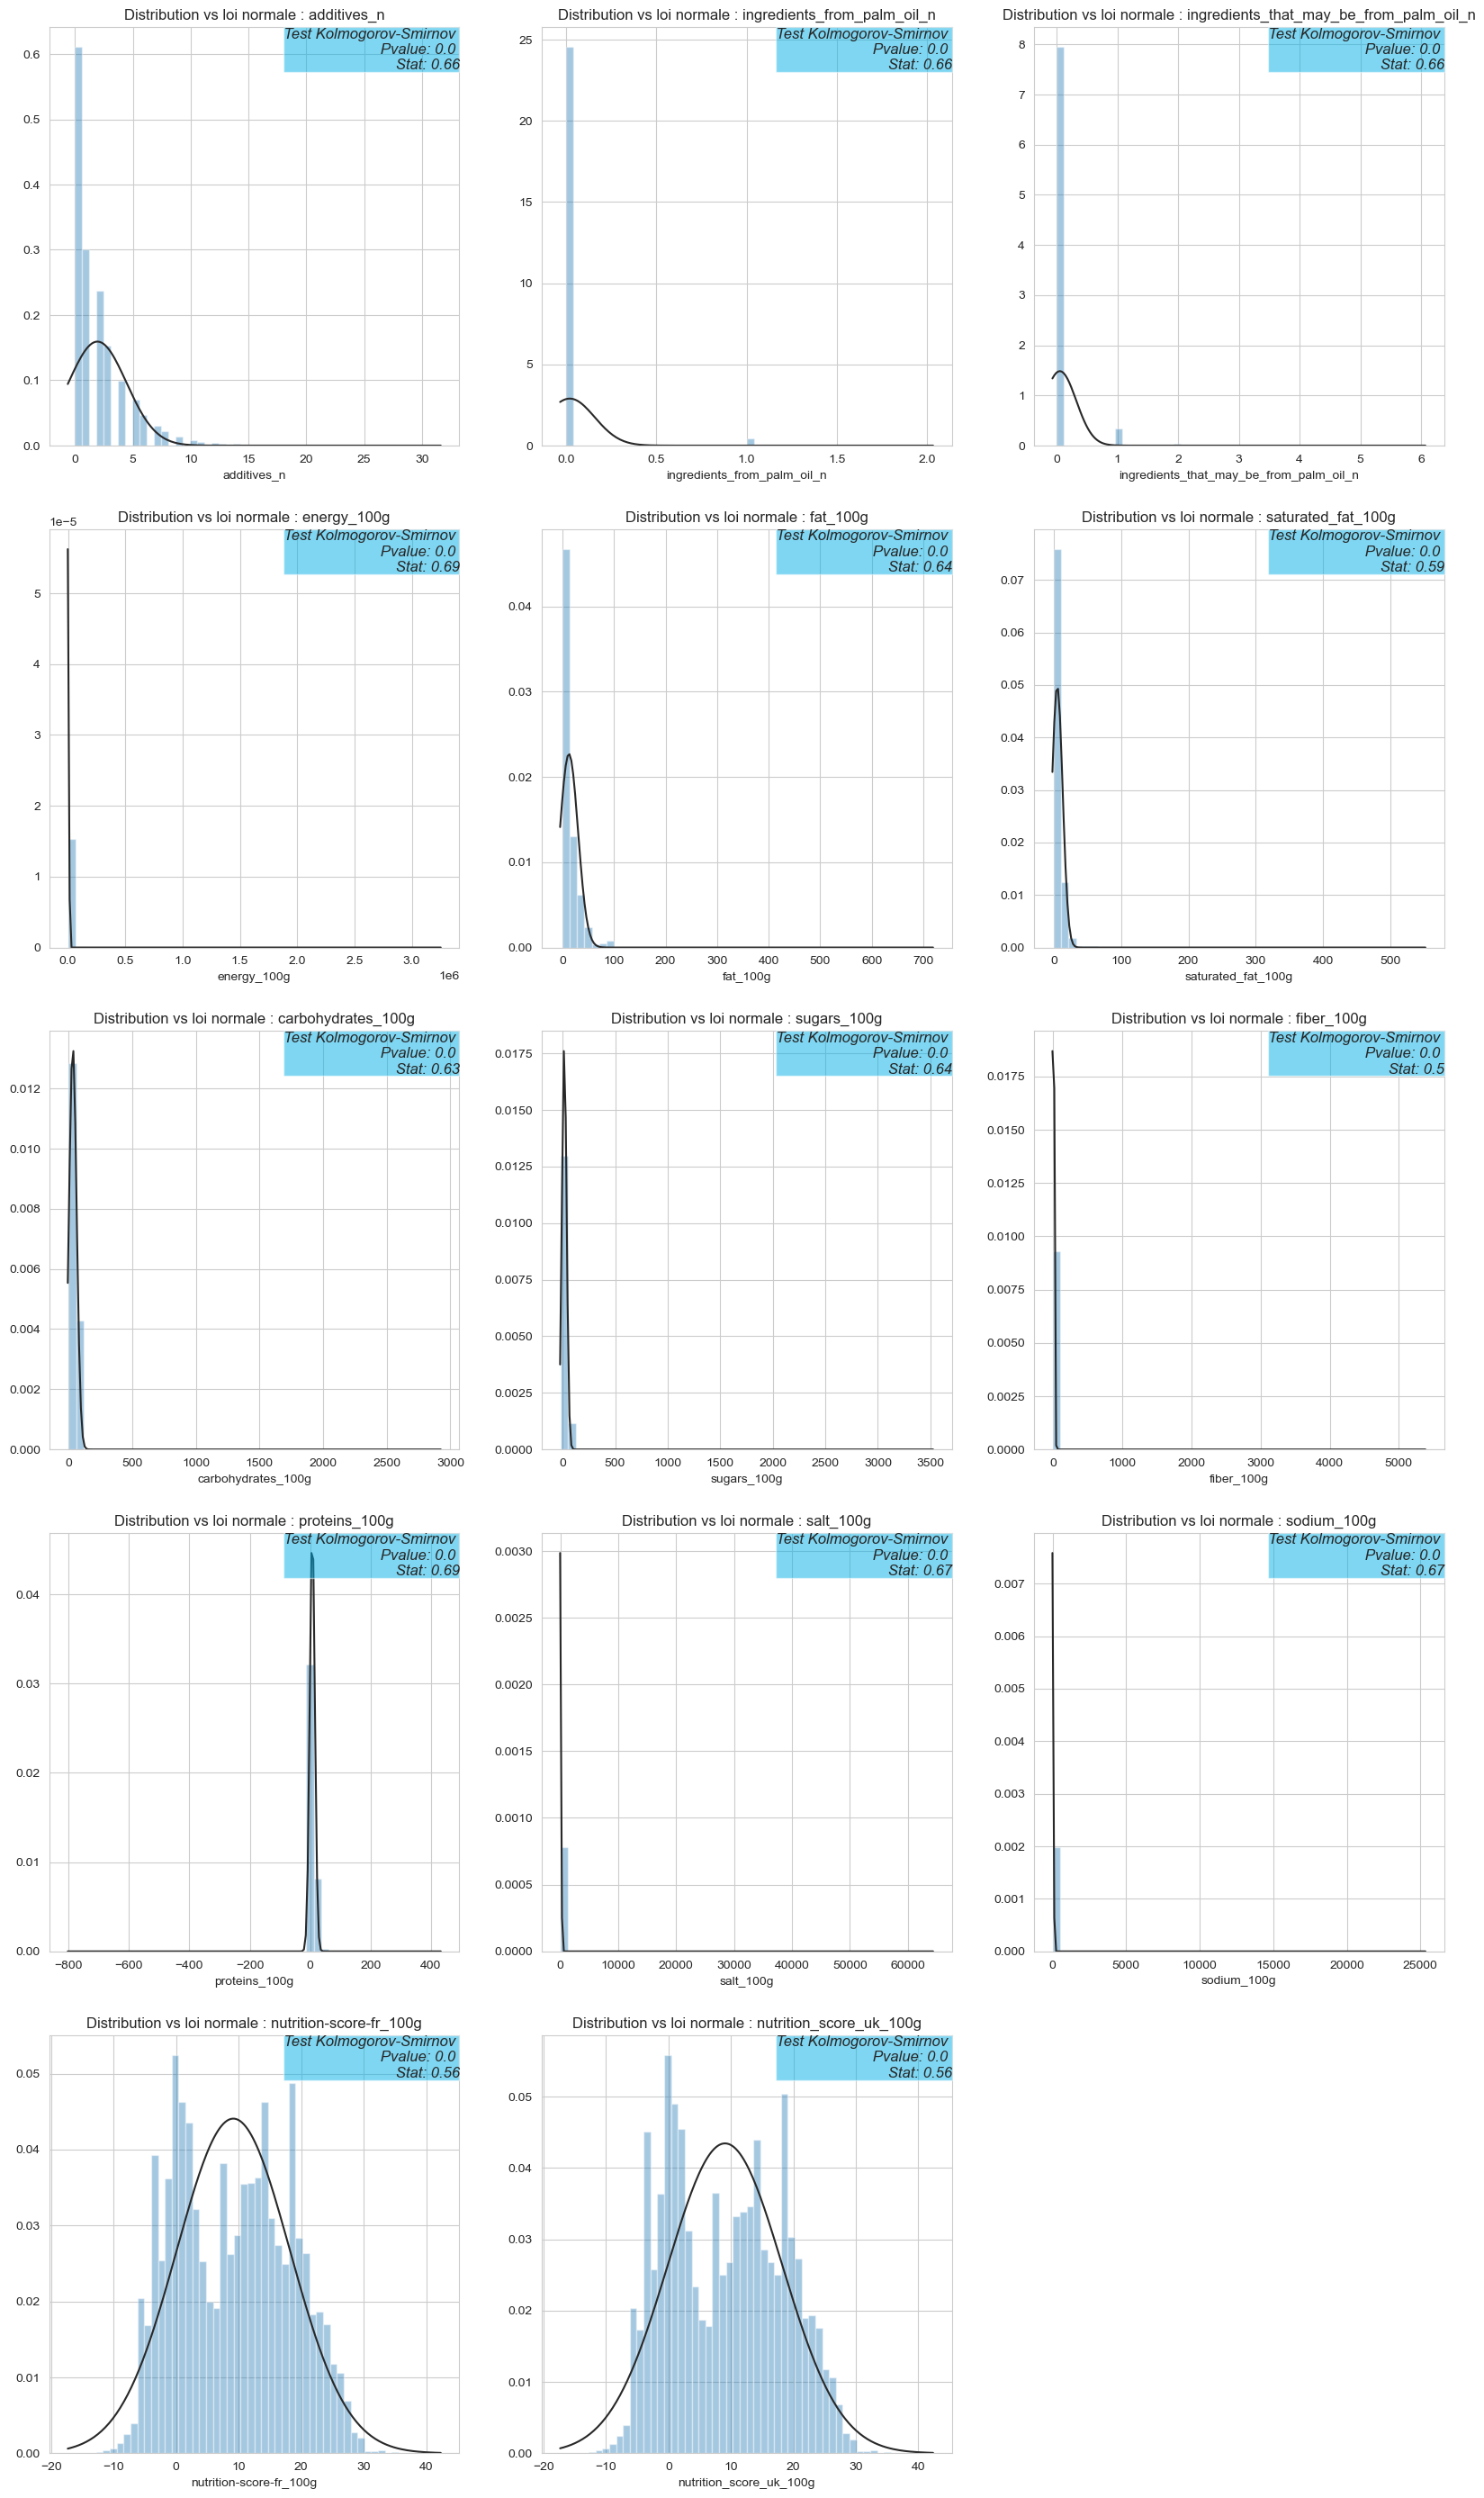

In [118]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,35))

sub = 0
for i in range(len(var_num_features)):
    fig.add_subplot(5,3,i+1)

    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height

    colonne = var_num_features[i]
    kstest = stats.kstest(df_filtré[colonne].notnull(),'norm')
    ax = sns.distplot(df_filtré[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

##### En se basant sur les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%), nous pouvons donc rejéter l'hyphotèse de normalité des distributions de ces variables. C'est à dire que les données de ces variables sont asymetrie. Il serait donc pas évident d'imputer ces valeurs manquantes par la moyenne et nous serons donc obligé de les imputés par la médiane.

### Matrice de corrélation entre les valeurs manquantes

 ##### Cette matrice va nous permettre de verifié si nos données manquantes sont MCAR, MAR, MNAR

<Axes: >

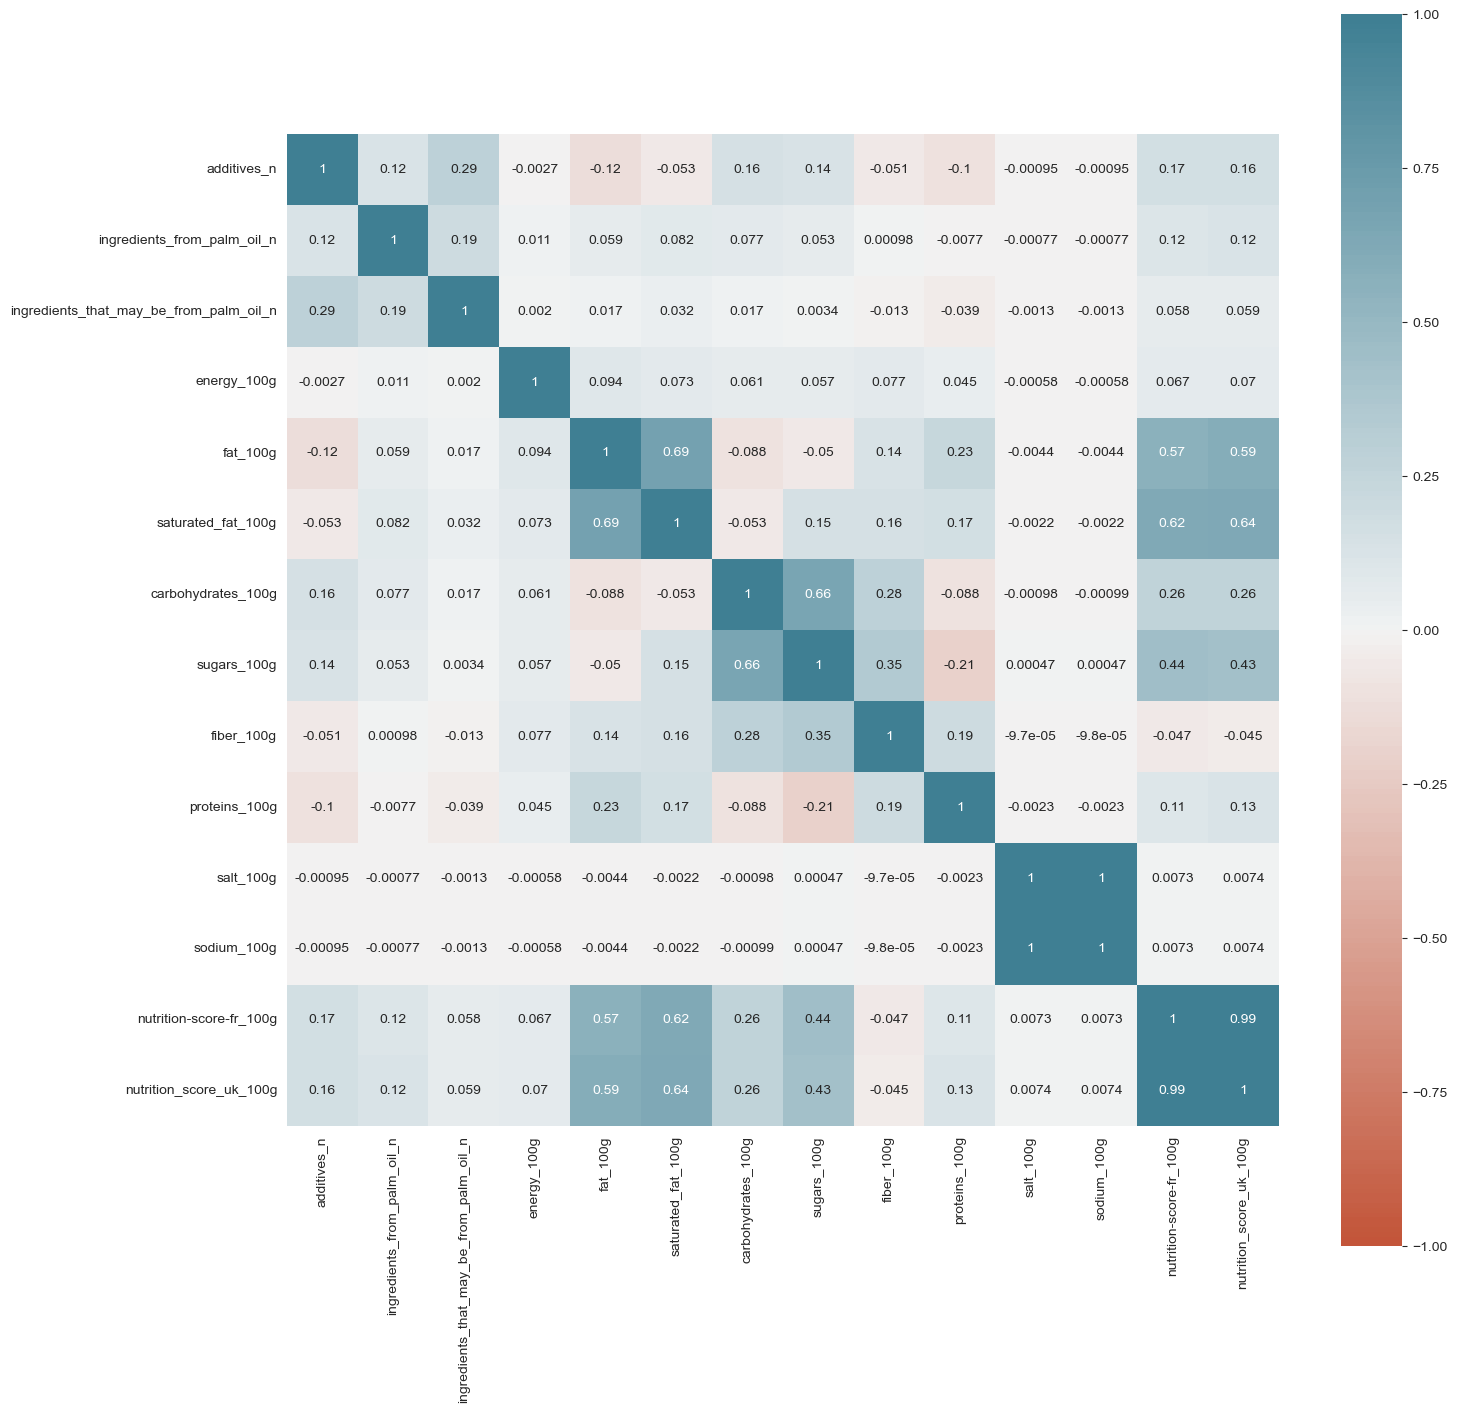

In [119]:
data_num = df_filtré.select_dtypes(include=['number'])
# Matrice de corrélation 
plt.figure(figsize=(16, 16))
cor = data_num.corr()
sns.heatmap(cor, annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

##### Nous pouvons remarquer avec la matrice de corrélation, que certaines variables sont corrélées entre elles. De ce fait, on peut affirmer que les données manquantes ne sont pas MCAR.

Imputation par la médiane, le mode et la moyenne
L'imputation par la moyenne, la médiane et le mode sont des méthodes simples pour remplacer les valeurs manquantes dans une variable.

--- L'imputation par la moyenne consiste à remplacer les valeurs manquantes par la moyenne des valeurs non manquantes dans la variable. Cette méthode est utile pour les variables continues et symétriques.

--- L'imputation par la médiane consiste à remplacer les valeurs manquantes par la médiane des valeurs non manquantes dans la variable. Cette méthode est utile pour les variables continues qui ont une distribution asymétrique ou pour les variables ordinales.

--- L'imputation par le mode consiste à remplacer les valeurs manquantes par le mode, c'est-à-dire la valeur la plus fréquente, dans la variable. Cette méthode est utile pour les variables catégorielles ou nominales.

Ces méthodes sont simples à mettre en œuvre et peuvent être efficaces lorsque les données manquantes sont MCAR (Missing Completely At Random), c'est-à-dire que les valeurs manquantes sont indépendantes des autres variables. Toutefois, elles peuvent introduire un biais dans les données si les valeurs manquantes sont liées à d'autres variables dans les données.

# Imputation des données

##### nous allons essayer chaque méthodes d'imputation et ensuite nous choisirons la méthode qui impute le mieux les données en fonction des caractéristiques de ses dernières.

###  - Imputation par le mode

In [120]:
data_imp_mo = df_filtré.copy()

for col in data_imp_mo.select_dtypes(object).columns :
    data_imp_mo[col] = data_imp_mo[col].fillna(data_imp_mo[col].mode()[0])

data_imp_mo.isnull().sum()


code                                            0
url                                             0
creator                                         0
created_datetime                                0
last_modified_datetime                          0
product_name                                    0
brands                                          0
brands_tags                                     0
countries                                       0
countries_tags                                  0
countries_fr                                    0
ingredients_text                                0
serving_size                                    0
additives_n                                 55919
additives                                       0
ingredients_from_palm_oil_n                 55919
ingredients_that_may_be_from_palm_oil_n     55919
nutrition_grade_fr                              0
states                                          0
states_tags                                     0


###  - Imputation par la médiane

In [122]:
data_imp_me = df_filtré.copy()

for col in data_imp_me.columns :
    if data_imp_me[col].dtype ==np.number:
          data_imp_me[col] = data_imp_me[col].fillna(data_imp_me[col].median())

data_imp_me.isnull().sum()

code                                          23
url                                           23
creator                                        1
created_datetime                               0
last_modified_datetime                         0
product_name                                   0
brands                                     13074
brands_tags                                13082
countries                                    228
countries_tags                               228
countries_fr                                 228
ingredients_text                           55896
serving_size                               93596
additives_n                                    0
additives                                  55950
ingredients_from_palm_oil_n                    0
ingredients_that_may_be_from_palm_oil_n        0
nutrition_grade_fr                         84547
states                                        46
states_tags                                   46
states_fr           

###  - Imputation par la méthode KNN 

L'algorithme IterativeImputer est utile lorsque les données manquantes sont MNAR (Missing Not At Random), c'est-à-dire que les valeurs manquantes sont liées à la valeur de la variable elle-même. Il peut être utilisé pour imputer des variables continues ou catégorielles. Toutefois, il peut être plus lent que d'autres méthodes d'imputation telles que la simple imputation.

In [123]:
data_imp_knn = data_imp_mo.copy()

In [124]:
data_imp_knn.dtypes

code                                               object
url                                                object
creator                                            object
created_datetime                           datetime64[ns]
last_modified_datetime                     datetime64[ns]
product_name                                       object
brands                                             object
brands_tags                                        object
countries                                          object
countries_tags                                     object
countries_fr                                       object
ingredients_text                                   object
serving_size                                       object
additives_n                                       float64
additives                                          object
ingredients_from_palm_oil_n                       float64
ingredients_that_may_be_from_palm_oil_n           float64
nutrition_grad

In [125]:
data_copy = data_imp_knn.select_dtypes(include='float64').copy()
simple_imputer =  SimpleImputer(strategy='median')
imputed_data = pd.DataFrame(simple_imputer.fit_transform(data_copy), columns=data_copy.columns, index=data_imp_knn.index)
imputed_cols = imputed_data.columns
for col in imputed_cols:
    data_imp_knn[col] = imputed_data[col].copy()
data_imp_knn.isna().sum()

code                                       0
url                                        0
creator                                    0
created_datetime                           0
last_modified_datetime                     0
product_name                               0
brands                                     0
brands_tags                                0
countries                                  0
countries_tags                             0
countries_fr                               0
ingredients_text                           0
serving_size                               0
additives_n                                0
additives                                  0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
nutrition_grade_fr                         0
states                                     0
states_tags                                0
states_fr                                  0
energy_100g                                0
fat_100g  

In [127]:
data_imp_knn.head(5)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_score_uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46,2016-09-17 09:18:13,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,...,5.00,1.79,20.60,5.71,1.5,4.76,0.58420,0.230,10.0,9.0
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),Carrefour,carrefour,US,en:united-states,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 10:35:31,2017-03-09 10:35:31,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 10:34:13,2017-03-09 10:34:13,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,...,1.43,1.79,77.14,5.71,5.7,8.57,0.58420,0.230,10.0,9.0


#### En conclusion, nous avons choisi la technique d'imputation par le mode pour les variables categorielles  et l'imputation par le KNN pour les variables quantitatives. l'imputation par la moyenne a été rejeté en raison de la non normalité des variables quantitatives sur le jeu de données.